In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

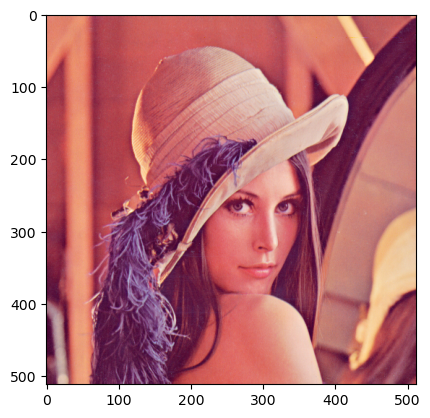

In [4]:
img = cv2.imread('Lena.png') 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
#prewitt filter
prewittx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitty = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

In [6]:
def convolution(img, kernel):
    img_h, img_w = img.shape
    kernel_h, kernel_w = kernel.shape
    h = kernel_h//2
    w = kernel_w//2
    new_img = np.zeros(img.shape)
    for i in range(h, img_h-h):
        for j in range(w, img_w-w):
            new_img[i,j] = np.sum(img[i-h:i+h+1, j-w:j+w+1]*kernel)
    return new_img

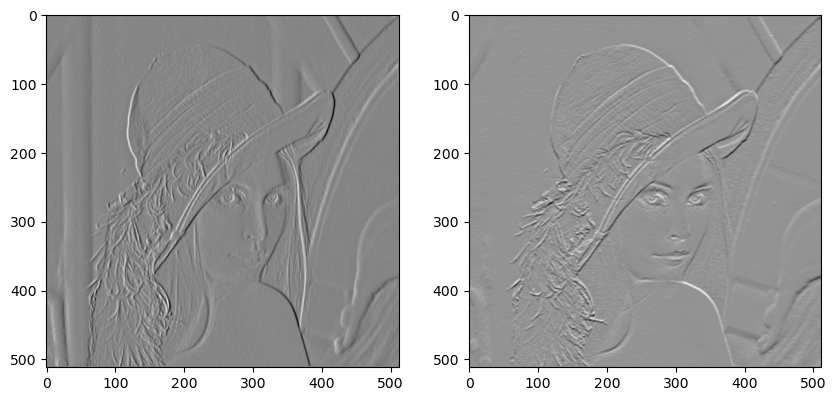

In [7]:
gx = convolution(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), prewittx)
gy = convolution(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), prewitty)
fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(gx,cmap='gray')
ax[1].imshow(gy,cmap='gray')
plt.show()

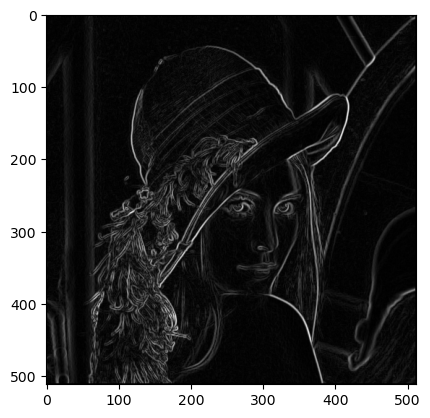

In [8]:
g = np.sqrt(gx**2+gy**2)
plt.imshow(g,cmap='gray')

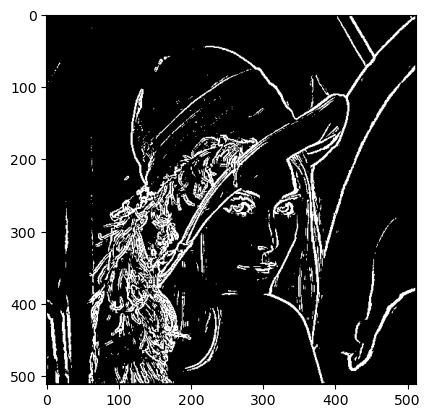

In [9]:
import copy
def threshold(new_g):
    g0=copy.deepcopy(new_g)
    for i in range(g0.shape[0]):
        for j in range(g0.shape[1]):
            if g0[i,j] > 80:
                g0[i,j] = 1
            else:
                g0[i,j] = 0
    return g0
final = threshold(g)
plt.imshow(final,cmap='gray')

In [12]:
def sharpen_img(img,final, alpha=30):
    new_img = copy.deepcopy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if final[i,j] == 1:
                new_img[i,j] = final[i,j]*alpha+img[i,j]
    return new_img

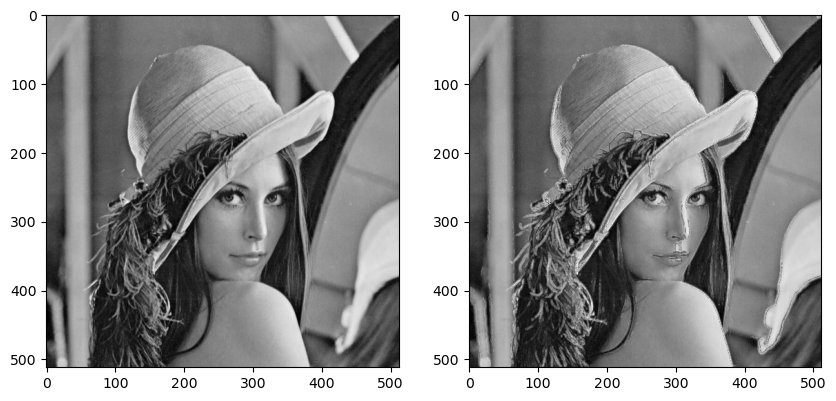

In [13]:

sharpened_img = sharpen_img(img,final)
fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),cmap='gray')
ax[1].imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2GRAY),cmap='gray')
plt.show()